In [14]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [15]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
data.drop(columns = 'body', axis = 1, inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<Axes: xlabel='survived', ylabel='fare'>

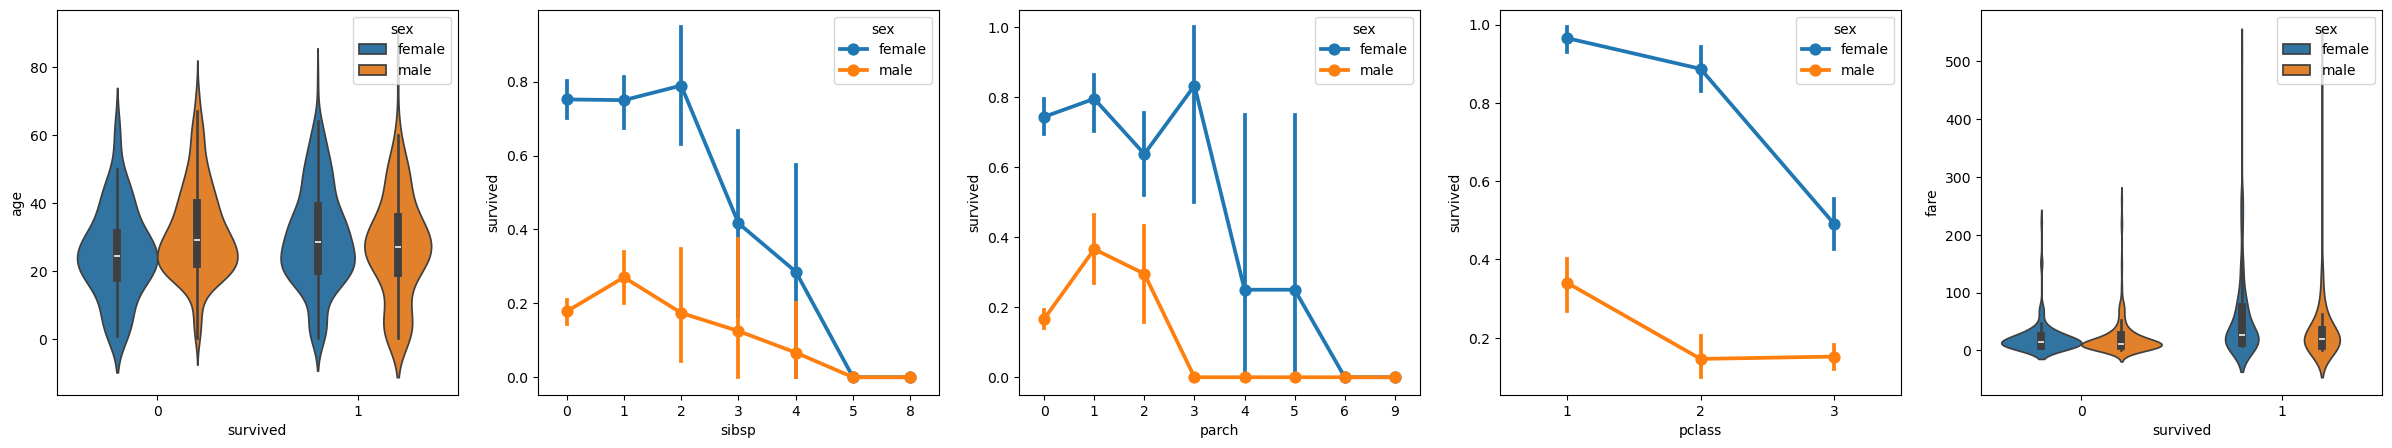

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 5, figsize = (30, 5))
sns.violinplot(x = 'survived', y = 'age', hue = 'sex', data = data, ax = axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [18]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [20]:
# change sex to numeric
data.replace({'male' : 1, 'female' : 0}, inplace = True)

In [24]:
# correlation
data.corr(numeric_only=True)[['survived']]

,survived
pclass,-0.312469
survived,1.000000
sex,-0.528693
age,-0.055512
sibsp,-0.027825
parch,0.082660
fare,0.244265


In [26]:
# use higher correlation variables and age
data = data[['pclass', 'sex', 'age', 'fare', 'survived']].dropna()

## Train and Evaluate Model

In [27]:
# create X and y
X = data.drop(columns = 'survived', axis = 1)
y = data['survived']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# x y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [30]:
# standard scaler
from sklearn.preprocessing import StandardScaler

In [31]:
# do not fit test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# use naive bayes
from sklearn.naive_bayes import GaussianNB

# create model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [34]:
from sklearn.metrics import accuracy_score

# make predictions on X_test
predict_test = model.predict(X_test)

# scores
score = accuracy_score(y_test, predict_test)
print(score)

0.7033492822966507
